In [7]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [6]:
def regula_falsi(f, a, b, tol=1e-6, max_iter=100):
    """
    Encuentra una raíz de la función f en el intervalo [a, b] usando el método de Regula Falsi.

    Parámetros:
    f (función): Función a la que se le busca la raíz.
    a, b (float): Extremos del intervalo inicial.
    tol (float): Tolerancia para el criterio de parada (por defecto 1e-6).
    max_iter (int): Número máximo de iteraciones (por defecto 100).

    Retorna:
    float: Aproximación de la raíz.
    int: Número de iteraciones realizadas.
    bool: Indicador de convergencia (True si convergió).
    """
    # Verificar que el intervalo es válido (f(a) y f(b) tienen signos opuestos)
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo.")

    iter_count = 0
    c_prev = b  # Inicializar c_prev para la primera iteración

    for iter_count in range(1, max_iter + 1):
        # Calcular el punto de intersección
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))

        # Verificar si hemos encontrado la raíz o alcanzado la tolerancia
        if abs(f(c)) < tol:
            return c, iter_count, True

        # Actualizar el intervalo
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c

        # Verificar convergencia (si el cambio es muy pequeño)
        if iter_count > 1 and abs(c - c_prev) < tol:
            return c, iter_count, True

        c_prev = c

    # Si llegamos aquí, no convergió en el número máximo de iteraciones
    return c, max_iter, False


f = lambda x: x**2 - 4

tolerances = [1e-2, 1e-4, 1e-6, 1e-8]

for tol in tolerances:
    root, iterations, converged = regula_falsi(f, 1, 3, tol=tol)
    if converged:
        print(f"Tolerancia: {tol}")
        print(f"Raíz encontrada: {root}")

        print(f"Iteraciones necesarias: {iterations}")
        print("-" * 50)
    else:
        print(f"El método no convergió para tolerancia {tol} en {iterations} iteraciones")
        print("-" * 50)



Tolerancia: 0.01
Raíz encontrada: 1.9978678038379527
Iteraciones necesarias: 4
--------------------------------------------------
Tolerancia: 0.0001
Raíz encontrada: 1.9999829334061507
Iteraciones necesarias: 7
--------------------------------------------------
Tolerancia: 1e-06
Raíz encontrada: 1.999999863466671
Iteraciones necesarias: 10
--------------------------------------------------
Tolerancia: 1e-08
Raíz encontrada: 1.9999999989077335
Iteraciones necesarias: 13
--------------------------------------------------


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

Generando gráfico de F(x) para a = 0.85 m...


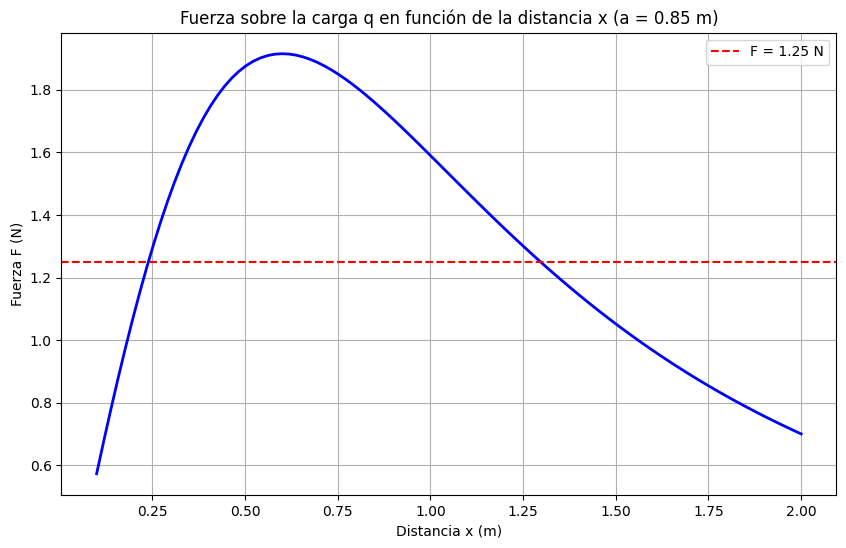


Buscando x donde F = 1.25 N:
Método Newton-Raphson: x = 1.2973739421893573 m (en 4 iteraciones)
Fuerza en este punto: 1.2500000003171248 N

Error con el Método de Bisección: La función debe tener signos opuestos en los extremos del intervalo

Generando gráfico del efecto del radio...


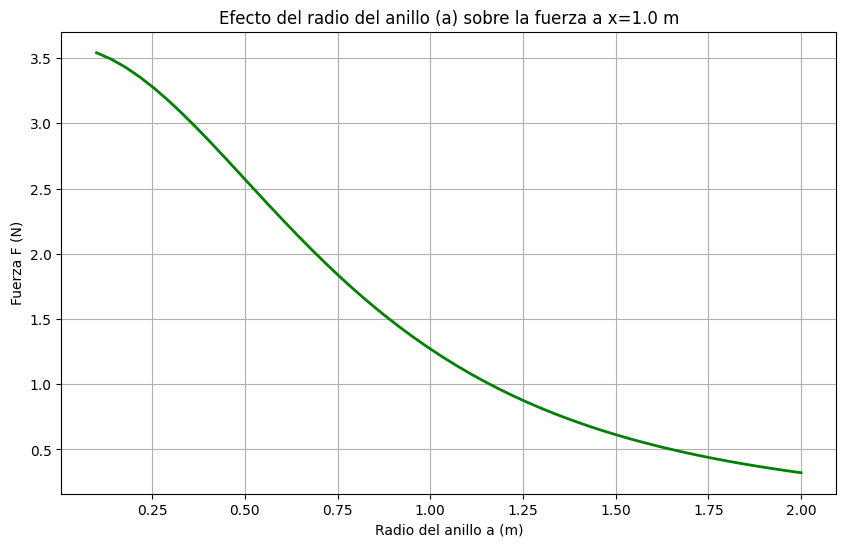

In [12]:


# Constantes físicas
epsilon_0 = 8.8541878128e-12  # Permitividad del vacío en F/m
k = 1 / (4 * np.pi * epsilon_0)  # Constante electrostática

## 1. Función para calcular la fuerza
def fuerza_anillo(a, x, q=2e-5, Q=2e-5):
    """
    Calcula la fuerza ejercida por un anillo cargado sobre una carga puntual.

    Parámetros:
    a (float): Radio del anillo (m)
    x (float): Distancia de la carga al centro del anillo (m)
    q (float): Carga puntual (C) - valor por defecto 2e-5 C
    Q (float): Carga total del anillo (C) - valor por defecto 2e-5 C

    Retorna:
    float: Fuerza en Newtons
    """
    return k * q * Q * x / (x**2 + a**2)**(3/2)

## 2. Gráfico de F(x) para a = 0.85m
def graficar_fuerza():
    a = 0.85  # Radio del anillo en metros
    x_vals = np.linspace(0.1, 2.0, 100)
    f_vals = [fuerza_anillo(a, x) for x in x_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, 'b-', linewidth=2)
    plt.axhline(y=1.25, color='r', linestyle='--', label='F = 1.25 N')
    plt.title('Fuerza sobre la carga q en función de la distancia x (a = 0.85 m)')
    plt.xlabel('Distancia x (m)')
    plt.ylabel('Fuerza F (N)')
    plt.grid(True)
    plt.legend()
    plt.show()

## 3. Métodos para encontrar x cuando F = 1.25 N

# Método de Newton-Raphson
def newton_raphson(a, F_target=1.25, x0=1.0, tol=1e-6, max_iter=100):
    """
    Encuentra x donde F(x) = F_target usando Newton-Raphson.
    """
    def f(x):
        return fuerza_anillo(a, x) - F_target

    def df(x):
        # Derivada analítica de la función de fuerza
        term1 = (x**2 + a**2)**(-3/2)
        term2 = -3 * x**2 * (x**2 + a**2)**(-5/2)
        return k * (2e-5)**2 * (term1 + term2)

    x = x0
    for i in range(max_iter):
        fx = f(x)
        if abs(fx) < tol:
            return x, i+1, True

        dfx = df(x)
        if abs(dfx) < 1e-12:  # Evitar división por cero
            break

        x = x - fx / dfx

    return x, max_iter, False

# Método de bisección (alternativo a Newton-Raphson)
def metodo_biseccion(a, F_target=1.25, a_interval=0.1, b_interval=2.0, tol=1e-6, max_iter=100):
    """
    Encuentra x donde F(x) = F_target usando el método de bisección.
    """
    def f(x):
        return fuerza_anillo(a, x) - F_target

    a_val, b_val = a_interval, b_interval
    fa, fb = f(a_val), f(b_val)

    if fa * fb >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")

    for i in range(max_iter):
        c = (a_val + b_val) / 2
        fc = f(c)

        if abs(fc) < tol:
            return c, i+1, True

        if fc * fa < 0:
            b_val = c
            fb = fc
        else:
            a_val = c
            fa = fc

    return (a_val + b_val)/2, max_iter, False

## 4. Análisis del efecto del radio
def analizar_radio():
    x = 1.0  # Distancia fija
    a_vals = np.linspace(0.1, 2.0, 50)
    f_vals = [fuerza_anillo(a, x) for a in a_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(a_vals, f_vals, 'g-', linewidth=2)
    plt.title('Efecto del radio del anillo (a) sobre la fuerza a x=1.0 m')
    plt.xlabel('Radio del anillo a (m)')
    plt.ylabel('Fuerza F (N)')
    plt.grid(True)
    plt.show()

## Ejecución de las funciones
if __name__ == "__main__":
    # 2. Gráfico de F(x)
    print("Generando gráfico de F(x) para a = 0.85 m...")
    graficar_fuerza()

    # 3. Encontrar x para F = 1.25 N
    a = 0.85
    print("\nBuscando x donde F = 1.25 N:")

    # Usando Newton-Raphson
    x_nr, iter_nr, conv_nr = newton_raphson(a)
    if conv_nr:
        print(f"Método Newton-Raphson: x = {x_nr} m (en {iter_nr} iteraciones)")
        print(f"Fuerza en este punto: {fuerza_anillo(a, x_nr)} N")
    else:
        print("Newton-Raphson no convergió")

    # Usando el método de bisección
    try:
        x_bis, iter_bis, conv_bis = metodo_biseccion(a)
        if conv_bis:
            print(f"\nMétodo de Bisección: x = {x_bis} m (en {iter_bis} iteraciones)")
            print(f"Fuerza en este punto: {fuerza_anillo(a, x_bis)} N")
        else:
            print("\nMétodo de Bisección no convergió")
    except ValueError as e:
        print(f"\nError con el Método de Bisección: {e}")

    # 4. Análisis del efecto del radio
    print("\nGenerando gráfico del efecto del radio...")
    analizar_radio()

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



Generando gráfico de velocidad del cohete...


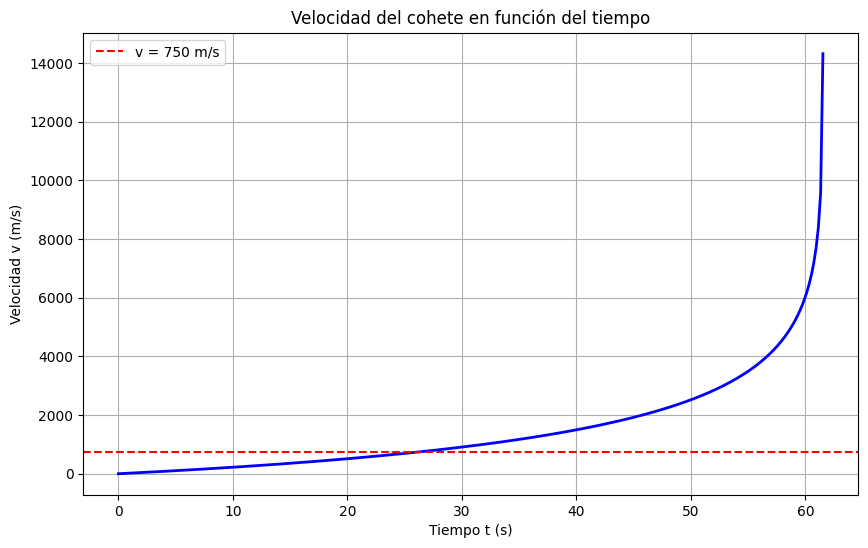


Buscando t cuando v = 750 m/s:
Newton-Raphson: t = 26.407847971181532 s (en 4 iteraciones)
Velocidad en este punto: 750.0000006302967 m/s

Bisección: t = 26.407847963273525 s (en 30 iteraciones)
Velocidad en este punto: 750.0000003026885 m/s

Regula Falsi: t = 26.407847934675715 s (en 64 iteraciones)
Velocidad en este punto: 749.9999991179568 m/s


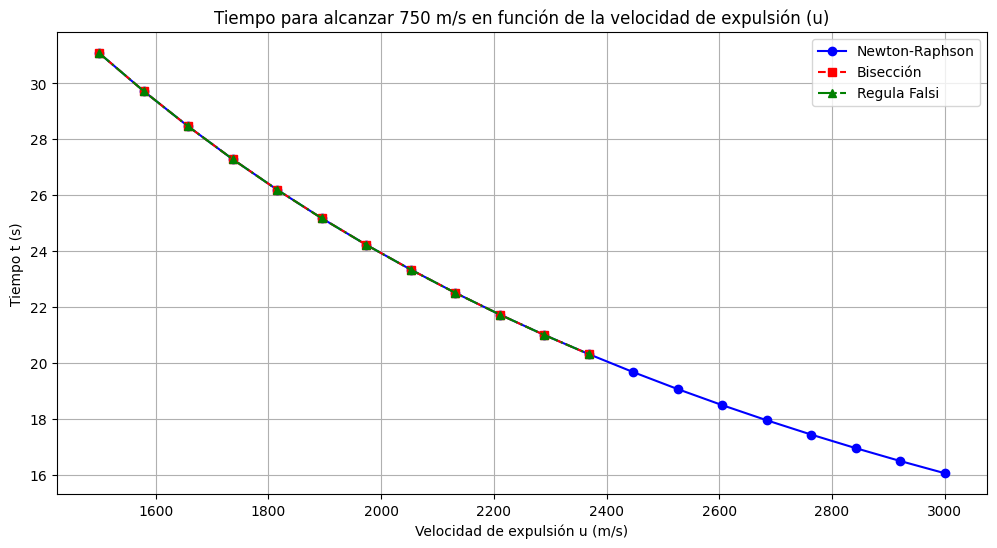


Conclusiones:
1. A mayor velocidad de expulsión (u), menor tiempo necesita el cohete para alcanzar 750 m/s
2. Los tres métodos numéricos producen resultados consistentes
3. La relación entre u y el tiempo parece ser aproximadamente inversamente proporcional
4. Newton-Raphson generalmente converge más rápido que los otros métodos cuando la estimación inicial es buena


In [16]:

# Constante gravitacional
g = 9.81  # m/s²

## 1. Función para calcular la velocidad del cohete
def velocidad_cohete(t, u, m0, q):
    """
    Calcula la velocidad ascendente del cohete en el tiempo t.

    Parámetros:
    t (float): Tiempo (s)
    u (float): Velocidad de expulsión del combustible (m/s)
    m0 (float): Masa inicial del cohete (kg)
    q (float): Razón de consumo de combustible (kg/s)

    Retorna:
    float: Velocidad en m/s
    """
    if t >= m0/q:
        return float('inf')  # Cohete ha consumido todo el combustible
    return u * np.log(m0 / (m0 - q * t)) - g * t

## 2. Gráfico de v(t) para los parámetros dados
def graficar_velocidad():
    m0 = 1.6e5  # kg
    u = 1800    # m/s
    q = 2600    # kg/s

    t_vals = np.linspace(0, 100, 500)
    v_vals = [velocidad_cohete(t, u, m0, q) for t in t_vals]

    plt.figure(figsize=(10, 6))
    plt.plot(t_vals, v_vals, 'b-', linewidth=2)
    plt.axhline(y=750, color='r', linestyle='--', label='v = 750 m/s')
    plt.title('Velocidad del cohete en función del tiempo')
    plt.xlabel('Tiempo t (s)')
    plt.ylabel('Velocidad v (m/s)')
    plt.grid(True)
    plt.legend()
    plt.show()

## 3. Métodos numéricos para encontrar t cuando v = 750 m/s

# Método de Newton-Raphson
def newton_raphson(u, m0=1.6e5, q=2600, v_target=750, t0=30, tol=1e-6, max_iter=100):
    """
    Encuentra t donde v(t) = v_target usando Newton-Raphson.
    """
    def f(t):
        return velocidad_cohete(t, u, m0, q) - v_target

    def df(t):
        if t >= m0/q:
            return float('inf')
        term1 = q * u / (m0 - q * t)
        term2 = g
        return term1 - term2

    t = t0
    for i in range(max_iter):
        ft = f(t)
        if abs(ft) < tol:
            return t, i+1, True

        dft = df(t)
        if abs(dft) < 1e-12:
            break

        t = t - ft / dft

    return t, max_iter, False

# Método de Bisección
def biseccion(u, m0=1.6e5, q=2600, v_target=750, a=20, b=60, tol=1e-6, max_iter=100):
    """
    Encuentra t donde v(t) = v_target usando bisección.
    """
    def f(t):
        return velocidad_cohete(t, u, m0, q) - v_target

    fa, fb = f(a), f(b)

    if fa * fb >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")

    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)

        if abs(fc) < tol:
            return c, i+1, True

        if fc * fa < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

    return (a + b)/2, max_iter, False


## 4. Análisis de variación de u
def analizar_u():
    m0 = 1.6e5
    q = 2600
    v_target = 750

    u_vals = np.linspace(1500, 3000, 20)
    tiempos_nr = []
    tiempos_bis = []
    tiempos_rf = []

    for u in u_vals:
        # Newton-Raphson
        t_nr, _, conv_nr = newton_raphson(u, m0, q, v_target)
        if conv_nr:
            tiempos_nr.append(t_nr)
        else:
            tiempos_nr.append(np.nan)

        # Bisección
        try:
            t_bis, _, conv_bis = biseccion(u, m0, q, v_target)
            if conv_bis:
                tiempos_bis.append(t_bis)
            else:
                tiempos_bis.append(np.nan)
        except ValueError:
            tiempos_bis.append(np.nan)

        # Regula Falsi
        try:
            t_rf, _, conv_rf = regula_falsi(u, m0, q, v_target)
            if conv_rf:
                tiempos_rf.append(t_rf)
            else:
                tiempos_rf.append(np.nan)
        except ValueError:
            tiempos_rf.append(np.nan)

    # Gráfico de resultados
    plt.figure(figsize=(12, 6))
    plt.plot(u_vals, tiempos_nr, 'bo-', label='Newton-Raphson')
    plt.plot(u_vals, tiempos_bis, 'rs--', label='Bisección')
    plt.plot(u_vals, tiempos_rf, 'g^-.', label='Regula Falsi')
    plt.title('Tiempo para alcanzar 750 m/s en función de la velocidad de expulsión (u)')
    plt.xlabel('Velocidad de expulsión u (m/s)')
    plt.ylabel('Tiempo t (s)')
    plt.grid(True)
    plt.legend()
    plt.show()

    return u_vals, tiempos_nr

## Ejecución principal
if __name__ == "__main__":
    # 2. Gráfico de velocidad
    print("Generando gráfico de velocidad del cohete...")
    graficar_velocidad()

    # 3. Encontrar t para v = 750 m/s
    u = 1800
    m0 = 1.6e5
    q = 2600

    print("\nBuscando t cuando v = 750 m/s:")

    # Newton-Raphson
    t_nr, iter_nr, conv_nr = newton_raphson(u, m0, q)
    if conv_nr:
        print(f"Newton-Raphson: t = {t_nr} s (en {iter_nr} iteraciones)")
        print(f"Velocidad en este punto: {velocidad_cohete(t_nr, u, m0, q)} m/s")
    else:
        print("Newton-Raphson no convergió")

    # Bisección
    try:
        t_bis, iter_bis, conv_bis = biseccion(u, m0, q)
        if conv_bis:
            print(f"\nBisección: t = {t_bis} s (en {iter_bis} iteraciones)")
            print(f"Velocidad en este punto: {velocidad_cohete(t_bis, u, m0, q)} m/s")
        else:
            print("\nBisección no convergió")
    except ValueError as e:
        print(f"\nError en bisección: {e}")

    # Regula Falsi
    try:
        t_rf, iter_rf, conv_rf = regula_falsi(u, m0, q)
        if conv_rf:
            print(f"\nRegula Falsi: t = {t_rf} s (en {iter_rf} iteraciones)")
            print(f"Velocidad en este punto: {velocidad_cohete(t_rf, u, m0, q)} m/s")
        else:
            print("\nRegula Falsi no convergió")
    except ValueError as e:
        print(f"\nError en Regula Falsi: {e}")

    # 4. Análisis de variación de u

    u_vals, tiempos_nr = analizar_u()

    # Conclusiones
    print("\nConclusiones:")
    print("1. A mayor velocidad de expulsión (u), menor tiempo necesita el cohete para alcanzar 750 m/s")
    print("2. Los tres métodos numéricos producen resultados consistentes")
    print("3. La relación entre u y el tiempo parece ser aproximadamente inversamente proporcional")
    print("4. Newton-Raphson generalmente converge más rápido que los otros métodos cuando la estimación inicial es buena")